# Pengantar Statistika

## Tugas 4: Distribusi Kontinu & Maximum Likelihood Estimation

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi **tugas4_NIM.ipynb**.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi dilarang keras menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

Terdapat beberapa pustaka yang Anda akan gunakan dalam mengerjakan tugas ini, yaitu:

- matplotlib
- numpy
- scipy

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini, kecuali dijelaskan sebaliknya. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda.

Pastikan jawaban Anda singkat, padat, dan jelas. Mayoritas pertanyaan yang diberikan dapat dijawab dalam 3-4 kalimat saja.

Untuk membantu menulis jawaban dalam bentuk formula $\LaTeX$, Anda dapat menggunakan [tautan ini](https://www.codecogs.com/latex/eqneditor.php).

Sebagai referensi untuk penggunaan Jupyter Notebook dan berbagai pustaka dalam Python, Anda dapat melihat referensi [ini](http://cs231n.github.io/python-numpy-tutorial/) dan [ini](https://nbviewer.jupyter.org/github/jupyter/notebook/tree/master/docs/source/examples/Notebook/).

**Nilai akhir: XX/25**

In [7]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [8]:
plt.rcParams['figure.figsize'] = (12,7)
plt.style.use('bmh')

In [9]:
## 1. Ujian CPNS (5 poin)

Dari 16,384 peserta ujian saringan awal CPNS, nilai rata-rata dari semua peserta adalah 58 dengan standar deviasi 12. Nilai maksimal yang dapat dicapai dari ujian tersebut adalah 100.

SyntaxError: invalid syntax (<ipython-input-9-0c801cfc81c7>, line 3)

### Soal 1.a (3 poin)

Asumsikan bahwa nilai ujian terdistribusi normal. Gambarkan [kurva PDF](https://stackoverflow.com/questions/10138085/python-pylab-plot-normal-distribution) dari distribusi tersebut.

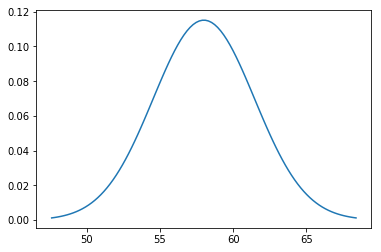

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

nilai_rata = 58
standar_deviasi = 12 
sigma = math.sqrt(standar_deviasi)
x = np.linspace(nilai_rata - 3*sigma, nilai_rata + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, nilai_rata, sigma))
plt.show()


### Soal 1.b (2 poin)

Jika nilai yang Anda dapatkan adalah 67 dan peserta ujian yang akan lolos ke tahap selanjutnya adalah 20% peserta dengan nilai tertinggi, apakah Anda termasuk yang lolos? Tunjukkan perhitungan Anda.

#p(z<zo) = 20% = 0,2
          Tabel Zo (0,2) = -0,57
          xa = (-0.57 x 12) + 58
             = 6,8 + 58
             = 64.8 //nilai terkecil
#p(z<zo) = 100% - 20%
         = 80% = 0,8
         Tabel Zo (0,8) = -0,78
         xa = (-0,78 x 12) + 58
            = 9,3 + 58
            = 67,3 //nilai tertinggi
Nilai yang didapatkan = 67
Jadi, 64,8<67<67,3
Berarti 67 lolos //kesimpulan

## 2. Data Tuberkulosis (20 poin)

Untuk bagian ini, Anda perlu untuk mempelajari cara menggunakan pustaka [Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html).

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/aliakbars/uai-stats/master/datasets/people.csv')
df['status'] = (df['status'] == 'MTB Pos').astype('int')

### Soal 2.1 (2 poin)

Jika kita mengasumsikan bahwa variabel tinggi badan (`height`) mengikuti distribusi normal dengan parameter $\mu$ dan $\sigma^2$, i.e.
$$
height \sim \mathcal{N}(\mu, \sigma^2)
$$
Berapakah nilai yang *paling mungkin* untuk $\mu$ dan $\sigma^2$?

$$\mu = 170$$
$$\sigma^2 = 12$$

### Soal 2.2 (3 poin)

Gambarkan [histogram](https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html) dari tinggi badan. Gambarkan juga kurva PDF dari distribusi normal dengan parameter yang Anda temukan di soal 2.1. Untuk histogram yang Anda buat, atur agar parameter `density=True`.

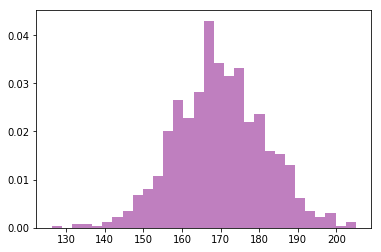

In [16]:
mu = 170
sigma = 12
x = np.random.normal(mu, sigma, 1000)
plt.hist(x, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='purple',
         edgecolor='none');

### Soal 2.3 (2 poin)

Apakah menurut Anda distribusi normal cocok untuk menggambarkan variabel tinggi badan? Salah satu cara untuk memastikan hal tersebut adalah dengan menghitung nilai **log likelihood**. Log likelihood didefinisikan sebagai
$$
\mathcal{L}(\theta) = \sum_{i=1}^N \log p(x_i|\theta)
$$
Implementasikan kode untuk menghitung nilai log likelihood dari data tinggi badan dengan parameter distribusi normal seperti pada soal 2.1. Sebagai bantuan, telah disediakan kode untuk memastikan hitungan Anda sesuai dengan implementasi dari [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

In [44]:
import numpy as np

x = np.log(170)
print (x)

5.135798437050262


### Soal 2.4 (3 poin)

Gambarkan [scatter plot](https://matplotlib.org/3.1.0/gallery/shapes_and_collections/scatter.html) untuk `height` dan `weight`. Jangan lupa untuk memberi label pada sumbu-sumbunya.

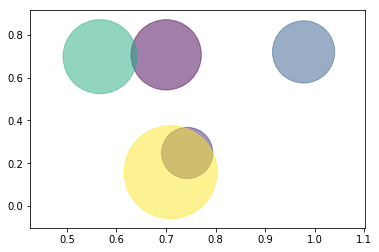

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 5
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (100 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

### Soal 2.5.a (1 poin)

Jika Anda berhasil menggambar dengan benar, Anda akan melihat bahwa `height` dan `weight` terlihat beriringan naik. Hitunglah nilai korelasi dari `height` dan `weight`.

In [67]:
import numpy as np

np.random.seed(1)

x = np.random.randint(0, 170, 1000) #tinggi

y = np.random.randint(0, 90, 1000)#berat

np.corrcoef(x, y)

array([[ 1.        , -0.02556465],
       [-0.02556465,  1.        ]])

### Soal 2.5.b (1 poin)

Hitung juga matriks kovariansi dari `height` dan `weight`.

In [63]:
np.cov((180,90), rowvar=0)

array(4050.)

### Soal 2.5.c (3 poin)

Jika Anda mengasumsikan bahwa `height` dan `weight` adalah dua peubah acak yang mengikuti distribusi [multivariat normal](https://docs.scipy.org/doc/scipy-1.3.0/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal), hitunglah peluang menemukan orang dengan `height ≤ 160` dan `weight ≤ 60`.

In [81]:
 y = multivariate_normal.pdf(0,60, 160); y

4.1023919668218175e-07

### Soal 2.6.a (2 poin)

Asumsikan bahwa variabel penyakit TB mengikuti distribusi Bernoulli. Dengan kata lain,

$$
X \sim Bernoulli(\theta)
$$

dan

$$
p(X) = \begin{cases}
\theta & \text{jika}~X = 1 \\
1-\theta & \text{jika}~X = 0
\end{cases}
$$

Berapa nilai parameter distribusi tersebut yang akan memaksimalkan nilai likelihood-nya?

In [0]:
display(HTML('$\hat \\theta = {}$'.format(
    # Kode Anda di sini
)))

### Soal 2.6.b (3 poin)

Gambarkan nilai **log likelihood** jika parameter distribusi Bernoulli Anda variasikan dari 0 sampai 1. Anda dapat menggunakan fungsi `np.linspace` untuk ini.

In [3]:
from scipy.stats import bernoulli


[-inf]


C:\Users\prako\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


## 3. Bonus (5 poin)

Gambarkan density plot dari MLE untuk distribusi multivariat normal dengan peubah acak `height` dan `weight`.

SyntaxError: invalid syntax (<ipython-input-89-83b403abfe2e>, line 5)